### Борисов Д.А.

#### Тема: Список лэптопов с параметрами для выбора

**Цель:** мы хотим выпустить ноутбук, но для этого нам нужно понимать оптимальные 
параметры для него, следовательно основываясь на пользовательском рейтинге нам
нужно выбрать оптимальную ОС, размер хранилища и т.п. <br><br>
**Гипотеза:** если мы выпустим ноутбук с наиболее востребованными характеристиками,
то он будет лучше продаваться. 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('laptops.csv', index_col=0)

In [6]:
df

,img_link,name,price(in Rs.),processor,ram,os,storage,display(in inch),rating,no_of_ratings,no_of_reviews
0,https://rukminim1.flixcart.com/image/312/312/x...,Lenovo Intel Core i5 11th Gen,62990,Intel Core i5 Processor (11th Gen),16 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,15.6,4.5,14.0,1.0
1,https://rukminim1.flixcart.com/image/312/312/x...,Lenovo V15 G2 Core i3 11th Gen,37500,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,1 TB HDD|256 GB SSD,15.6,4.4,53.0,3.0
2,https://rukminim1.flixcart.com/image/312/312/l...,ASUS TUF Gaming F15 Core i5 10th Gen,49990,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,15.6,4.4,4733.0,463.0
3,https://rukminim1.flixcart.com/image/312/312/x...,ASUS VivoBook 15 (2022) Core i3 10th Gen,33990,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,15.6,4.3,10406.0,1040.0
4,https://rukminim1.flixcart.com/image/312/312/x...,Lenovo Athlon Dual Core,18990,AMD Athlon Dual Core Processor,4 GB DDR4 RAM,DOS Operating System,256 GB SSD,14.0,3.8,18.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
979,https://rukminim1.flixcart.com/image/312/312/k...,ASUS VivoBook 15 Core i3 10th Gen,37990,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,15.6,4.0,1907.0,227.0
980,https://rukminim1.flixcart.com/image/312/312/k...,HP Chromebook MediaTek Kompanio 500,22670,MediaTek MediaTek Kompanio 500 Processor,4 GB LPDDR4X RAM,Chrome Operating System,1 TB HDD,11.6,3.8,5991.0,687.0
981,https://rukminim1.flixcart.com/image/312/312/x...,ASUS Ryzen 5 Hexa Core,54990,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,14.0,4.5,22.0,5.0
982,https://rukminim1.flixcart.com/image/312/312/k...,DELL Inspiron Core i3 11th Gen,40990,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,1 TB HDD|256 GB SSD,15.6,4.0,801.0,104.0


### 1. Проверка качества данных:

**Проверка типов данных колонок и приведение их к нужному типу**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 984 entries, 0 to 983
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   img_link          984 non-null    object 
 1   name              984 non-null    object 
 2   price(in Rs.)     984 non-null    int64  
 3   processor         984 non-null    object 
 4   ram               984 non-null    object 
 5   os                984 non-null    object 
 6   storage           984 non-null    object 
 7   display(in inch)  984 non-null    float64
 8   rating            688 non-null    float64
 9   no_of_ratings     688 non-null    float64
 10  no_of_reviews     688 non-null    float64
dtypes: float64(4), int64(1), object(6)
memory usage: 92.2+ KB


Проверка типов данных колонок показала, что все колонки имеют подходящий тип данных

**Проверка наличия и обработка пропущенных значений**

In [12]:
print("Вычисление кол-ва пропусков данных:")
df.isna().sum()

Вычисление кол-ва пропусков данных:


img_link              0
name                  0
price(in Rs.)         0
processor             0
ram                   0
os                    0
storage               0
display(in inch)      0
rating              296
no_of_ratings       296
no_of_reviews       296
dtype: int64

Проверка показала, что данные отсутствуют в последних трех колонках: `rating`, `no_of_ratings`, `no_of_reviews` <br>
Данные колонки содержат информацию о рейтинге товара (модели ноутбука), количестве оценок и количестве отзывов (обзоров) соответственно

In [14]:
print("Процент кол-ва строк с пропусками относительно общего числа строк:", 
      np.round(df[['rating', 'no_of_ratings', 'no_of_reviews']].isna().sum()/len(df)*100),
      sep='\n')

Процент кол-ва строк с пропусками относительно общего числа строк:
rating           30.0
no_of_ratings    30.0
no_of_reviews    30.0
dtype: float64


In [15]:
print("Там, где значения столбца 'rating' являются NaN, все значения столбца 'no_of_ratings' тоже являются NaN:",
     df[df['rating'].isna()]['no_of_ratings'].isna().all())
print("Там, где значения столбца 'rating' являются NaN, все значения столбца 'no_of_reviews' тоже являются NaN:",
     df[df['rating'].isna()]['no_of_reviews'].isna().all())

Там, где значения столбца 'rating' являются NaN, все значения столбца 'no_of_ratings' тоже являются NaN: True
Там, где значения столбца 'rating' являются NaN, все значения столбца 'no_of_reviews' тоже являются NaN: True


Проверка показала, что пропуски значений наблюдаются в одних и тех же рядах во всех трех колонках

Отсутствие данных в рассмотренных выше колонках может объясняться разничными причинами: например, если произошел технический сбой, если ноутбук появился в продаже недавно или покупатели просто не имели желания или необходимости производить обратную связь. Возможен вариант отсутствия продаж определенных моделей. 

По этой причине было принято решение заполнить пропуски нулями, т.к. отсутствие информации о рейтинге, оценках и отзывах предполагает, что конечный пользователь имеет информацию о 0 оценок и 0 отзывов. 

Заполнение пропущенных данных нулями может привести к некорректному вычислению статистических показателей. Для корректировки вычислений статистических показателей используется маска для фильтрации тех объектов датасета, для которых заполнение пропущенных значений не осуществлялось. Таким образом, вычисления будут производиться на реальных данных

In [20]:
mask = df.isna().any(axis=1)  # маска 
# Заполнение пропусков нулями:
df.fillna(0, inplace=True)
print("Вычисление кол-ва пропусков данных после заполнения:")
df.isna().sum()

Вычисление кол-ва пропусков данных после заполнения:


img_link            0
name                0
price(in Rs.)       0
processor           0
ram                 0
os                  0
storage             0
display(in inch)    0
rating              0
no_of_ratings       0
no_of_reviews       0
dtype: int64

**Проверка данных на наличие дубликатов**

In [22]:
print("В данных имеются дублирующиеся данные:", df.duplicated().any())

В данных имеются дублирующиеся данные: True


In [23]:
print(f"Датасет имеет {df.duplicated().sum()} строк-дубликатов")

Датасет имеет 187 строк-дубликатов


In [24]:
print("Размер датасета перед исключением дубликатов строк:", len(df))
mask = mask[~df.duplicated()]
df.drop_duplicates(inplace=True)  # удаление дубликатов
print("Размер датасета после исключения дубликатов строк:", len(df))

Размер датасета перед исключением дубликатов строк: 984
Размер датасета после исключения дубликатов строк: 797


### 2. Рассчет основных статистических показателей для числовых переменных

In [26]:
print("Список предложенных размеров экранов:")
print(df[~mask]['display(in inch)'].unique())

Список предложенных размеров экранов:
[15.6  14.   13.3  17.3  11.6  16.   16.1  13.6  13.4  16.2  14.2  14.1
 14.96 35.   16.6  15.  ]


Изучение предложений по размерам экрана показало, что диагональные размеры дисплеев всех моделей принимают значения из рассмотренного выше списка.
Поэтому вычисление среднего значения, стандартного отклонения и т.п. по данному параметру является некорректным подходом.

In [28]:
# Общая информационная сводка по данным:
df[~mask][['price(in Rs.)', 'rating', 'no_of_ratings', 'no_of_reviews']].describe()

,price(in Rs.),rating,no_of_ratings,no_of_reviews
count,531.000000,531.000000,531.000000,531.000000
mean,70958.193974,4.273446,688.165725,82.702448
std,44831.132621,0.359863,1766.214946,212.978655
min,15990.000000,1.600000,1.000000,0.000000
25%,41990.000000,4.100000,15.000000,2.000000
50%,59990.000000,4.300000,87.000000,11.000000
75%,80790.000000,4.500000,463.000000,57.500000
max,345390.000000,5.000000,15492.000000,2054.000000


In [29]:
# Расчет медианных значений для числовых признаков:
df[~mask][['price(in Rs.)', 'rating', 'no_of_ratings', 'no_of_reviews']].median()

price(in Rs.)    59990.0
rating               4.3
no_of_ratings       87.0
no_of_reviews       11.0
dtype: float64

In [30]:
# Расчет моды для числовых признаков:
df[~mask][['price(in Rs.)', 'rating', 'no_of_ratings', 'no_of_reviews']].mode()

,price(in Rs.),rating,no_of_ratings,no_of_reviews
0,59990,4.4,3.0,0.0


In [31]:
print('Медиана выборки размеров дисплев:', df[~mask]['display(in inch)'].median())
print('Мода выборки размеров дисплев:', df[~mask]['display(in inch)'].mode()[0]);

Медиана выборки размеров дисплев: 15.6
Мода выборки размеров дисплев: 15.6


### 3. Построение графиков

**Диаграмма распределения цен**

Text(0.5, 0, 'price(in Rs.)')

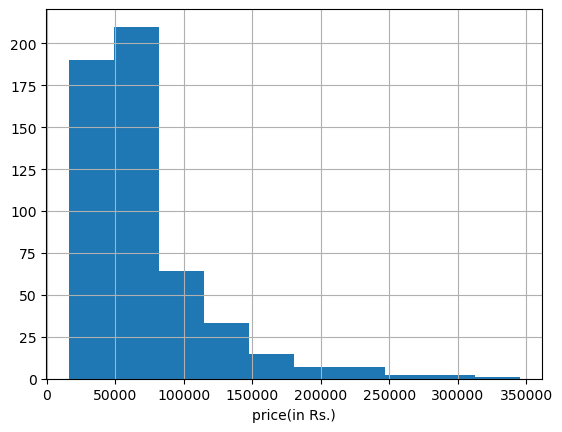

In [34]:
df[~mask]['price(in Rs.)'].hist()
plt.xlabel('price(in Rs.)')

**Диаграммы распределений:**
- оценок
- количества оценок
- количества отзывов

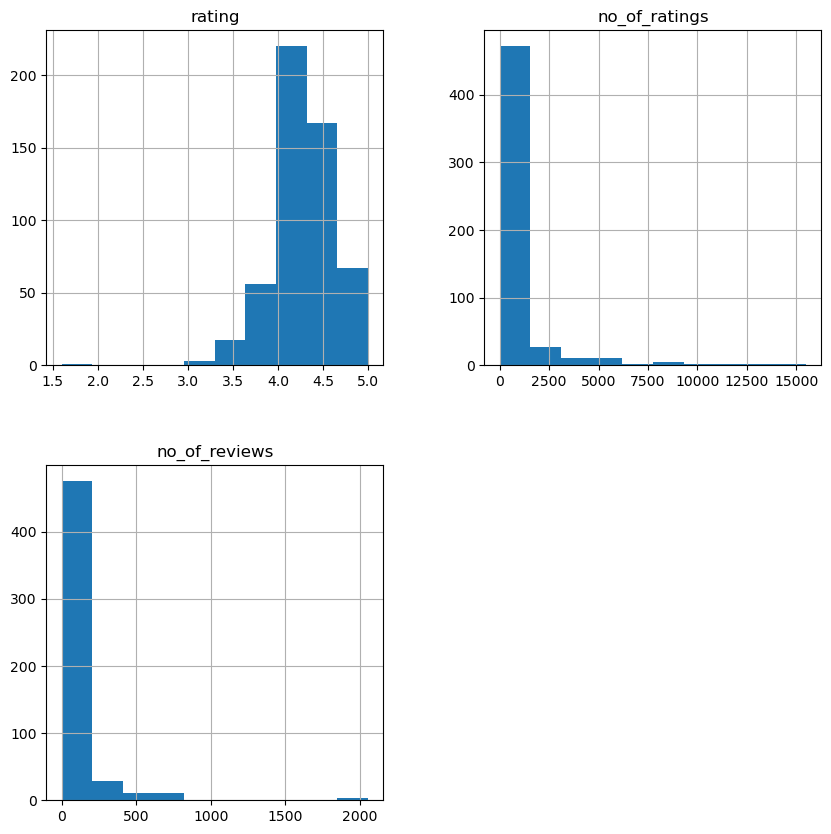

In [36]:
df[~mask][['rating', 'no_of_ratings', 'no_of_reviews']].hist(figsize=(10, 10));

#### Изучение данных о диагональных размерах дисплеев

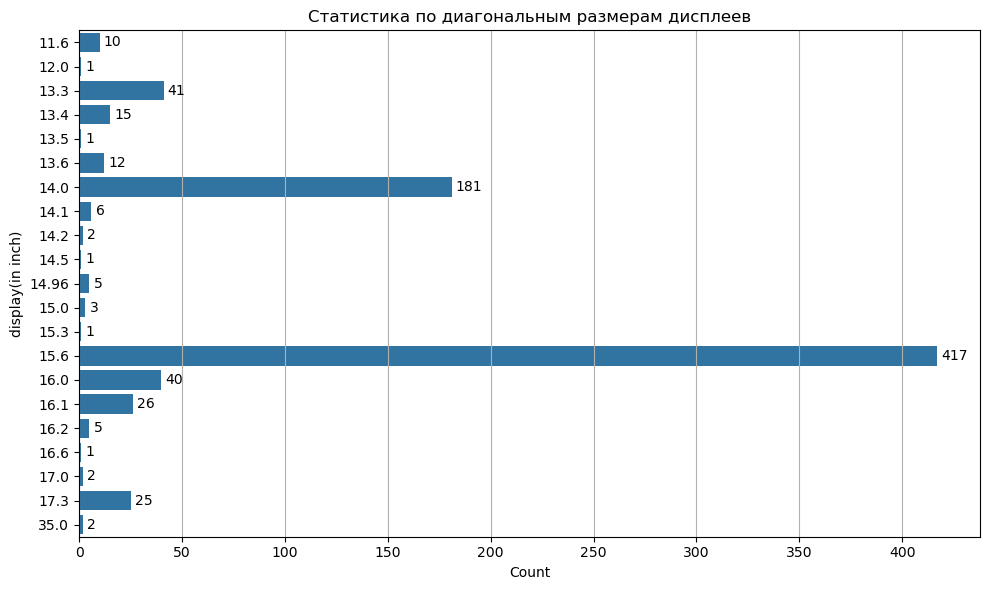

In [38]:
plt.figure(figsize=(10, 6))
plt.grid()
ax = sns.countplot(data=df, y='display(in inch)')
for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3)
plt.xlabel('Count')
plt.ylabel('display(in inch)')
plt.title('Статистика по диагональным размерам дисплеев')
plt.tight_layout()
plt.show()

#### Изучение данных об операционных системах

In [40]:
print("Список уникальных ОС:")
print(df['os'].unique())

Список уникальных ОС:
['Windows 11 Operating System' '64 bit Windows 11 Operating System'
 'DOS Operating System' 'Mac OS Operating System'
 '64 bit Windows 10 Operating System' '32 bit Windows 11 Operating System'
 'Chrome Operating System' '64 bit Chrome Operating System'
 'Windows 10 Operating System' '64 bit DOS Operating System'
 '64 bit Windows 8 Operating System']


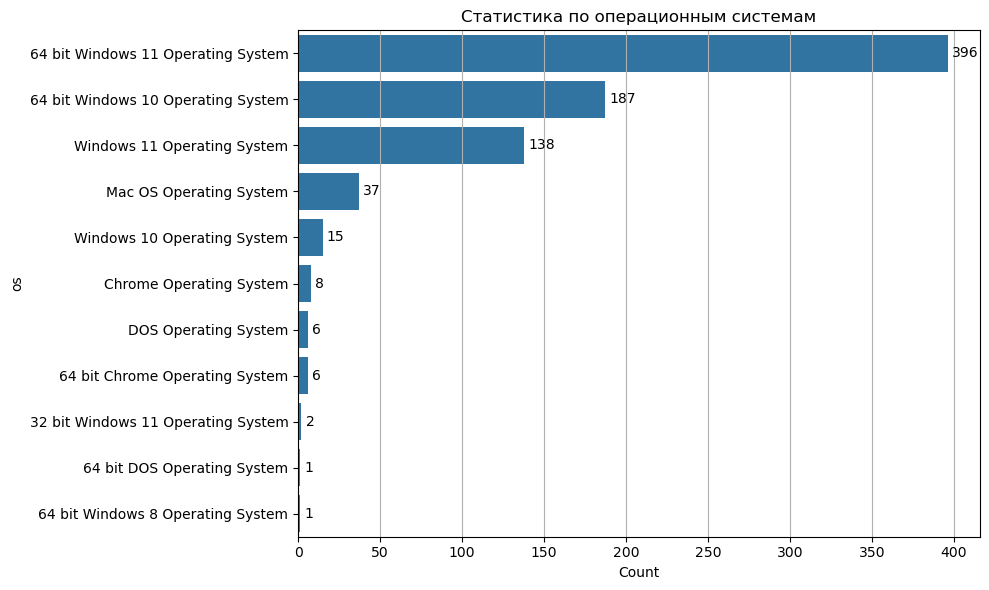

In [41]:
plt.figure(figsize=(10, 6))
plt.grid()
ax = sns.countplot(data=df, y='os', order=df['os'].value_counts().index)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3)
plt.xlabel('Count')
plt.ylabel('os')
plt.title('Статистика по операционным системам')
plt.tight_layout()
plt.show()

In [42]:
df_os = df[['os', 'rating']].copy()
df_os_rating = df_os[~mask].groupby('os').mean()
df_os_rating.sort_values(by='rating', ascending=False)

,rating
os,
Mac OS Operating System,4.668000
Windows 10 Operating System,4.350000
64 bit Windows 11 Operating System,4.285768
64 bit Windows 10 Operating System,4.249020
Windows 11 Operating System,4.238889
32 bit Windows 11 Operating System,4.100000
64 bit Chrome Operating System,4.016667
Chrome Operating System,3.862500
64 bit Windows 8 Operating System,3.800000


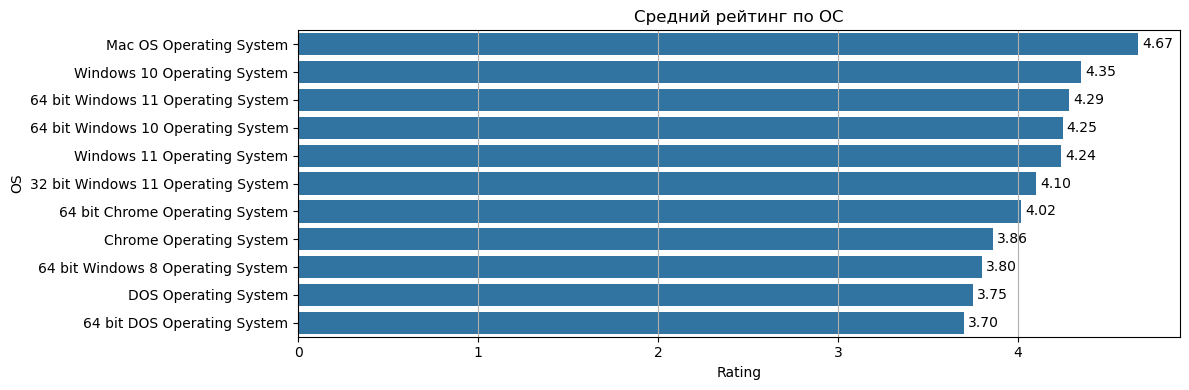

In [43]:
plt.figure(figsize=(12, 4))
df_os_rating_sort = df_os_rating.sort_values(by='rating', ascending=False)
plt.grid()
ax = sns.barplot(y=df_os_rating_sort.index, x=df_os_rating_sort['rating'])
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3)
plt.title('Средний рейтинг по ОС')
plt.xlabel('Rating')
plt.ylabel('OS')
plt.tight_layout()
plt.show()

#### Изучение данных о характеристиках хранилища

In [45]:
df['storage'].unique()

array(['512 GB SSD', '1 TB HDD|256 GB SSD', '256 GB SSD', '1 TB SSD',
       '2 TB SSD', '1 TB HDD|512 GB SSD', '1 TB HDD', '128 GB SSD',
       '256 GB HDD|256 GB SSD', '4 TB SSD', '512 GB HDD|512 GB SSD',
       '1 TB HDD|128 GB SSD',
       'PCI-e SSD (NVMe) ready,Silver-Lining Print Keyboard,Matrix Display (Extend),Cooler Boost 5,Hi-Res Audio,Nahimic 3,144Hz Panel,Thin Bezel,RGB Gaming Keyboard,Speaker Tuning Engine,MSI Center',
       'PCI-e Gen4 SSD?SHIFT?Matrix Display (Extend)?Cooler Boost 3?Thunderbolt 4?Finger Print Security?True Color 2.0?Hi-Res Audio?Nahimic 3? 4-Sided Thin bezel?MSI Center?Silky Smooth Touchpad?Military-Grade Durability',
       '2 TB HDD', '256 GB HDD'], dtype=object)

В процессе исследования были выявлены некорректные данные в колонке `storage`. В частности, некорректными были признаны строки: <br>
- `'PCI-e SSD (NVMe) ready,Silver-Lining Print Keyboard,Matrix Display (Extend),Cooler Boost 5,Hi-Res Audio,Nahimic 3,144Hz Panel,Thin Bezel,RGB Gaming Keyboard,Speaker Tuning Engine,MSI Center'`
- `'PCI-e Gen4 SSD?SHIFT?Matrix Display (Extend)?Cooler Boost 3?Thunderbolt 4?Finger Print Security?True Color 2.0?Hi-Res Audio?Nahimic 3? 4-Sided Thin bezel?MSI Center?Silky Smooth Touchpad?Military-Grade Durability'`

Данные строки похожи на описание товара, возможно, они попали в данные поля по ошибке

Проверим количество вхождений некорректных строк в предоставленные данные

In [48]:
strange_str_1 = 'PCI-e SSD (NVMe) ready,Silver-Lining Print Keyboard,Matrix Display (Extend),Cooler Boost 5,Hi-Res Audio,Nahimic 3,144Hz Panel,Thin Bezel,RGB Gaming Keyboard,Speaker Tuning Engine,MSI Center'
strange_str_2 = 'PCI-e Gen4 SSD?SHIFT?Matrix Display (Extend)?Cooler Boost 3?Thunderbolt 4?Finger Print Security?True Color 2.0?Hi-Res Audio?Nahimic 3? 4-Sided Thin bezel?MSI Center?Silky Smooth Touchpad?Military-Grade Durability'

print('Кол-во вхождений первой некорректной строки в датасет:', (df['storage'] == strange_str_1).sum())
print('Кол-во вхождений второй некорректной строки в датасет:', (df['storage'] == strange_str_2).sum())


Кол-во вхождений первой некорректной строки в датасет: 1
Кол-во вхождений второй некорректной строки в датасет: 1


Изучим строки с некорректными характеристиками хранилища

In [50]:
df.loc[(df['storage'] == strange_str_1) | (df['storage'] == strange_str_2)]

,img_link,name,price(in Rs.),processor,ram,os,storage,display(in inch),rating,no_of_ratings,no_of_reviews
595,https://rukminim1.flixcart.com/image/312/312/k...,MSI Alpha 15 Ryzen 7 Octa Core 5800H,98990,AMD Ryzen 7 Octa Core Processor,16 GB DDR4 RAM,64 bit Windows 10 Operating System,"PCI-e SSD (NVMe) ready,Silver-Lining Print Key...",15.6,4.5,413.0,63.0
698,https://rukminim1.flixcart.com/image/312/312/k...,MSI Prestige 14 Intel EVO Core i5 11th Gen,74990,Intel Core i5 Processor (11th Gen),16 GB LPDDR4X RAM,64 bit Windows 10 Operating System,PCI-e Gen4 SSD?SHIFT?Matrix Display (Extend)?C...,14.0,4.5,11.0,1.0


Как видим, остальные столбцы содержат корректные данные. По этой причине было принято решение не исключать информацию по данной модели из датасета. Заменим некорректные данные на строку: `No info`.

In [52]:
df.loc[(df['storage'] == strange_str_1) | (df['storage'] == strange_str_2), 'storage'] = 'No info'

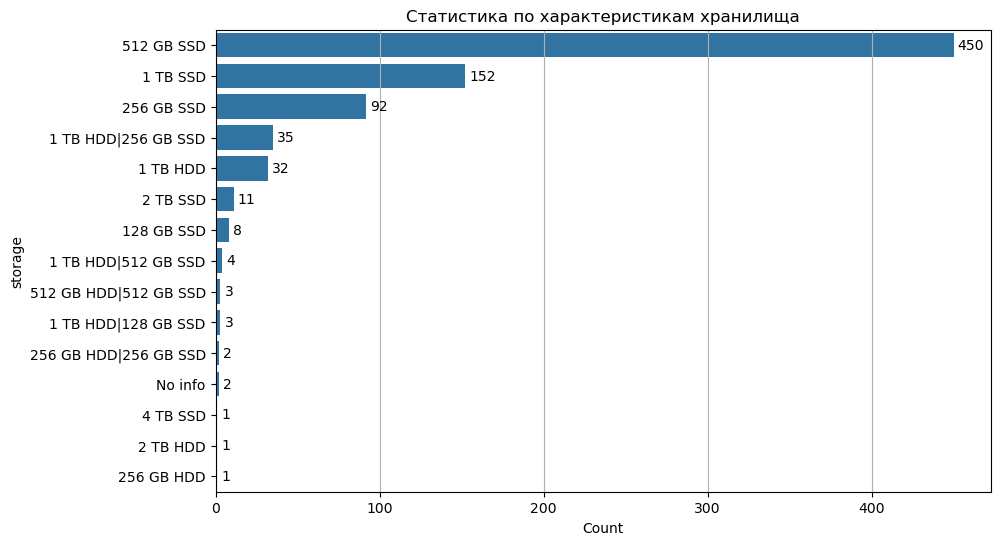

In [53]:
plt.figure(figsize=(10, 6))
plt.grid()
ax = sns.countplot(data=df, y='storage', order=df['storage'].value_counts().index)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3)
plt.xlabel('Count')
plt.ylabel('storage')
plt.title('Статистика по характеристикам хранилища')
plt.show()

In [54]:
df_storage = df[['storage', 'rating']]
df_storage_rating = df_storage[~mask].groupby('storage').mean()
df_storage_rating.sort_values(by='rating', ascending=False)

,rating
storage,
256 GB HDD,4.700000
1 TB HDD|128 GB SSD,4.500000
No info,4.500000
1 TB SSD,4.425806
1 TB HDD|512 GB SSD,4.375000
512 GB SSD,4.300935
256 GB SSD,4.253425
1 TB HDD|256 GB SSD,4.200000
2 TB SSD,4.133333


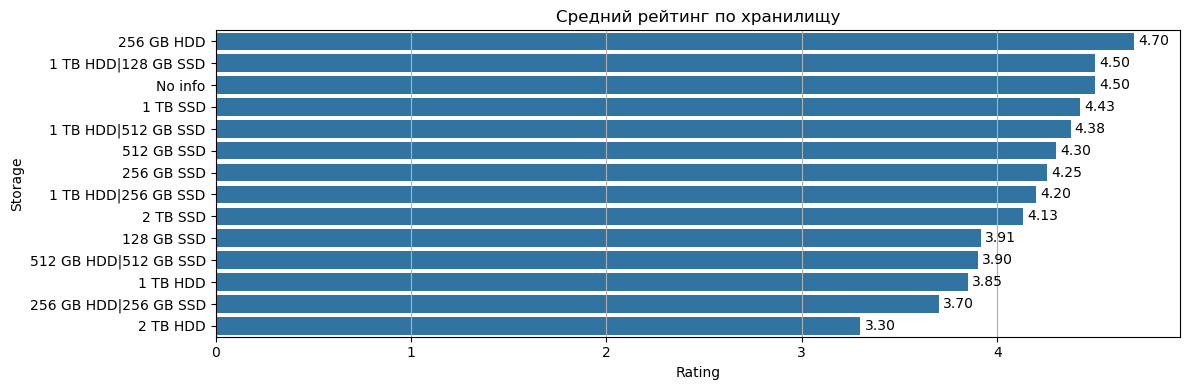

In [55]:
plt.figure(figsize=(12, 4))
df_storage_rating_sort = df_storage_rating.sort_values(by='rating', ascending=False)
plt.grid()
ax = sns.barplot(y=df_storage_rating_sort.index, x=df_storage_rating_sort['rating'])
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3)
plt.title('Средний рейтинг по хранилищу')
plt.xlabel('Rating')
plt.ylabel('Storage')
plt.tight_layout()
plt.show()

#### Изучение данных о характеристиках оперативной памяти

In [57]:
print("Список уникальных опций конфигураций RAM:")
print(df['ram'].unique())

Список уникальных опций конфигураций RAM:
['16 GB DDR4 RAM' '8 GB DDR4 RAM' '4 GB DDR4 RAM' '16 GB LPDDR5 RAM'
 '16 GB DDR5 RAM' '4 GB LPDDR4X RAM' '8 GB LPDDR4X RAM'
 '8 GB Unified Memory RAM' '32 GB LPDDR5 RAM' '32 GB DDR5 RAM'
 '4 GB LPDDR4 RAM' '16 GB LPDDR4X RAM' '8 GB DDR5 RAM'
 '32 GB Unified Memory RAM' '16 GB Unified Memory RAM' '16 GB LPDDR4 RAM'
 '32 GB DDR4 RAM' '8 GB DDR3 RAM' '16 GB LPDDR3 RAM' '8 GB LPDDR3 RAM'
 '32 GB LPDDR4X RAM' '16 GB DDR3 RAM']


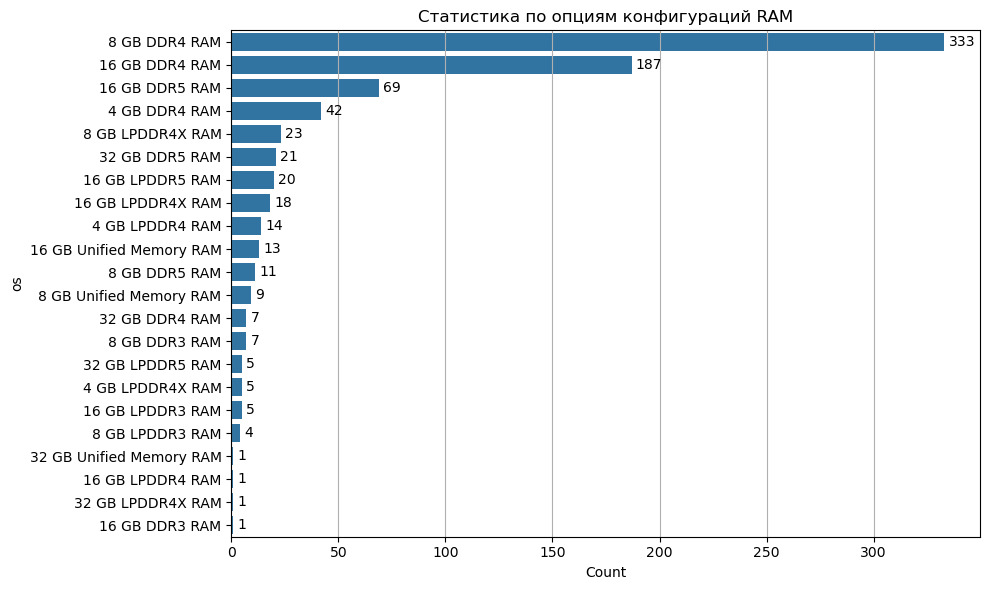

In [58]:
plt.figure(figsize=(10, 6))
plt.grid()
ax = sns.countplot(data=df, y='ram', order=df['ram'].value_counts().index)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3)
plt.xlabel('Count')
plt.ylabel('os')
plt.title('Статистика по опциям конфигураций RAM')
plt.tight_layout()
plt.show()

In [59]:
df_ram = df[['ram', 'rating']].copy()
df_ram_rating = df_ram[~mask].groupby('ram').mean()
df_ram_rating.sort_values(by='rating', ascending=False)

,rating
ram,
16 GB LPDDR3 RAM,5.000000
16 GB Unified Memory RAM,4.800000
32 GB DDR5 RAM,4.800000
8 GB Unified Memory RAM,4.700000
32 GB LPDDR5 RAM,4.700000
32 GB DDR4 RAM,4.600000
16 GB DDR4 RAM,4.416260
16 GB LPDDR5 RAM,4.400000
8 GB LPDDR4X RAM,4.350000


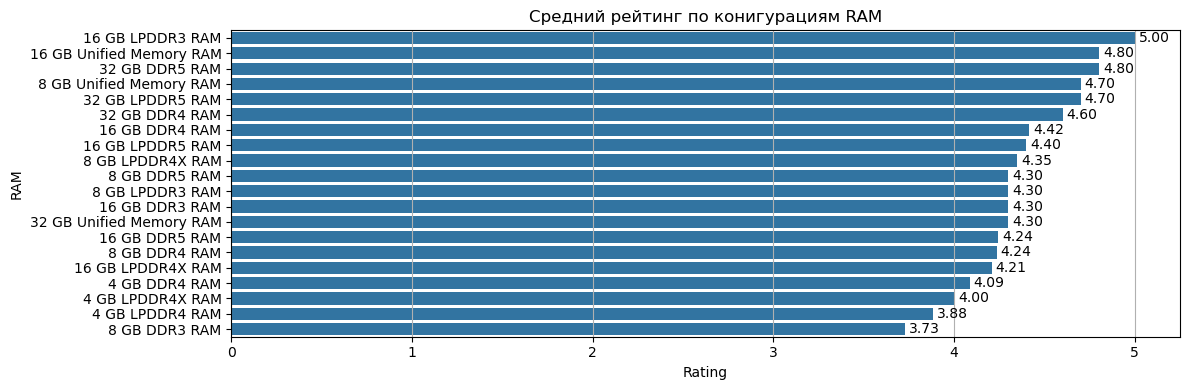

In [60]:
plt.figure(figsize=(12, 4))
df_ram_rating_sort = df_ram_rating.sort_values(by='rating', ascending=False)
plt.grid()
ax = sns.barplot(y=df_ram_rating_sort.index, x=df_ram_rating_sort['rating'], )
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3)
plt.title('Средний рейтинг по конигурациям RAM')
plt.xlabel('Rating')
plt.ylabel('RAM')
plt.tight_layout()
plt.show()

#### Изучение данных о процессорах

In [62]:
print('Кол-во уникальных моделей процессоров:', df['processor'].nunique())
print('Уникальные модели процессоров:', df['processor'].unique())

Кол-во уникальных моделей процессоров: 59
Уникальные модели процессоров: ['Intel Core i5 Processor (11th Gen)' 'Intel Core i3 Processor (11th Gen)'
 'Intel Core i5 Processor (10th Gen)' 'Intel Core i3 Processor (10th Gen)'
 'AMD Athlon Dual Core Processor' 'Apple M1 Processor'
 'Intel Celeron Dual Core Processor' 'AMD Ryzen 3 Quad Core Processor'
 'AMD Ryzen 3 Dual Core Processor' 'Intel Core i5 Processor (12th Gen)'
 'Intel Core i7 Processor (11th Gen)' 'AMD Ryzen 5 Hexa Core Processor'
 'Intel Core i3 Processor (12th Gen)' 'AMD Ryzen 7 Octa Core Processor'
 'Qualcomm Snapdragon 7c Gen 2 Processor'
 'Intel Core i7 Processor (12th Gen)' 'Intel Pentium Silver Processor'
 'AMD Ryzen 5 Quad Core Processor' 'Apple M2 Processor'
 'Intel Core i9 Processor (12th Gen)' 'Intel Core i9 Processor (13th Gen)'
 'Intel Core i7 Processor (13th Gen)' 'AMD Dual Core Processor'
 'AMD Ryzen 9 Octa Core Processor' 'Apple M1 Max Processor'
 'Apple M1 Pro Processor' 'Apple M2 Pro Processor'
 'Intel Pentium 

In [63]:
df_processors = pd.DataFrame(df['processor'])
df_processors['brand'] = df_processors['processor'].apply(lambda x: x.split()[0])
df_processors = df_processors.groupby('brand').agg(
                                    count = ('processor', 'count'),
                                    n_models=('processor', 'nunique'),
                                    models=('processor', 'unique'))
df_processors

,count,n_models,models
brand,,,
AMD,238,20,"[AMD Athlon Dual Core Processor, AMD Ryzen 3 Q..."
Apple,36,5,"[Apple M1 Processor, Apple M2 Processor, Apple..."
Intel,521,32,"[Intel Core i5 Processor (11th Gen), Intel Cor..."
MediaTek,1,1,[MediaTek MediaTek Kompanio 500 Processor]
Qualcomm,1,1,[Qualcomm Snapdragon 7c Gen 2 Processor]


In [64]:
# Проверка того, что никакие данные не "потерялись"
print(df_processors['count'].sum() == len(df['processor']))
print(df_processors['n_models'].sum() == df['processor'].nunique())

True
True


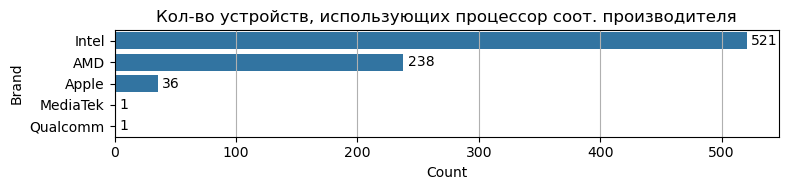

In [65]:
plt.figure(figsize=(8, 2))
plt.grid()
df_processors_sort = df_processors.sort_values(by='count', ascending=False)
ax = sns.barplot(y=df_processors_sort.index, x=df_processors_sort['count'])
for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3)
plt.title('Кол-во устройств, использующих процессор соот. производителя')
plt.xlabel('Count')
plt.ylabel('Brand')
plt.tight_layout()
plt.show()

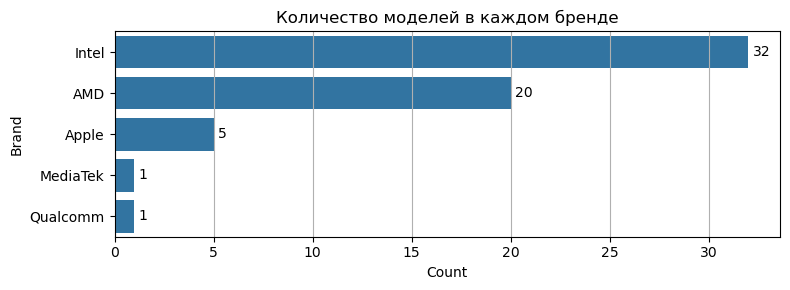

In [66]:
plt.figure(figsize=(8, 3))
plt.grid()
df_processors_sort = df_processors.sort_values(by='n_models', ascending=False)
ax = sns.barplot(y=df_processors_sort.index, x=df_processors_sort['n_models'], )
for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3)
plt.title('Количество моделей в каждом бренде')
plt.xlabel('Count')
plt.ylabel('Brand')
plt.tight_layout()
plt.show()

In [67]:
df_processors = pd.DataFrame(df[['processor', 'rating']])
df_processors['brand'] = df_processors['processor'].apply(lambda x: x.split()[0])
df_processors_rating = df_processors[~mask].groupby('brand').agg(mean_rating=('rating', 'mean'))
df_processors_rating

,mean_rating
brand,
AMD,4.344966
Apple,4.687500
Intel,4.217135
MediaTek,3.800000
Qualcomm,4.200000


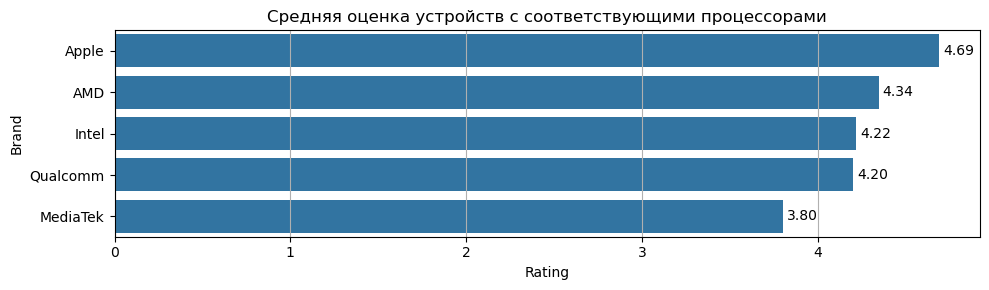

In [68]:
plt.figure(figsize=(10, 3))
plt.grid()
df_processors_sort = df_processors_rating.sort_values(by='mean_rating', ascending=False)
ax = sns.barplot(y=df_processors_sort.index, x=df_processors_sort['mean_rating'])
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3)
plt.title('Средняя оценка устройств с соответствующими процессорами')
plt.xlabel('Rating')
plt.ylabel('Brand')
plt.tight_layout()
plt.show()

#### Изучение данных по производителям

Так как одна и та же модель ноутбука может иметь разные характеристики (например, объем внутреннего хранилища). Следует учесть это наблюдение в исследовании:
- Количество моделей будет рассматриваться без учета вариантов тех. характеристик в пределах одной модели
- Количество предложений - количество всех доступных вариантов ноутбуков от данного производителя

In [71]:
df_names = pd.DataFrame(df[['name', 'rating']])
df_names['brand'] = df_names['name'].apply(lambda x: x.split()[0].lower())
df_names = df_names.groupby('brand').agg(
                                    count = ('name', 'count'),
                                    n_models=('name', 'nunique'),
                                    models=('name', 'unique'))
df_names

,count,n_models,models
brand,,,
acer,56,43,"[acer Aspire 3 Ryzen 3 Dual Core 3250U, acer S..."
alienware,4,2,"[ALIENWARE Core i9 10th Gen, ALIENWARE Core i7..."
apple,37,9,"[APPLE 2020 Macbook Air M1, APPLE 2022 MacBook..."
asus,224,164,"[ASUS TUF Gaming F15 Core i5 10th Gen, ASUS Vi..."
avita,5,4,"[Avita SATUS S111 Celeron Dual Core, Avita Pur..."
dell,132,61,"[DELL Vostro Ryzen 3 Quad Core 5425U, DELL Vos..."
gigabyte,6,6,"[GIGABYTE G5 ME, GIGABYTE G5 GE, GIGABYTE AERO..."
hp,149,85,"[HP 14s Intel Core i3 11th Gen, HP Ryzen 5 Hex..."
infinix,22,9,"[Infinix X1 Slim Series Core i3 10th Gen, Infi..."


М

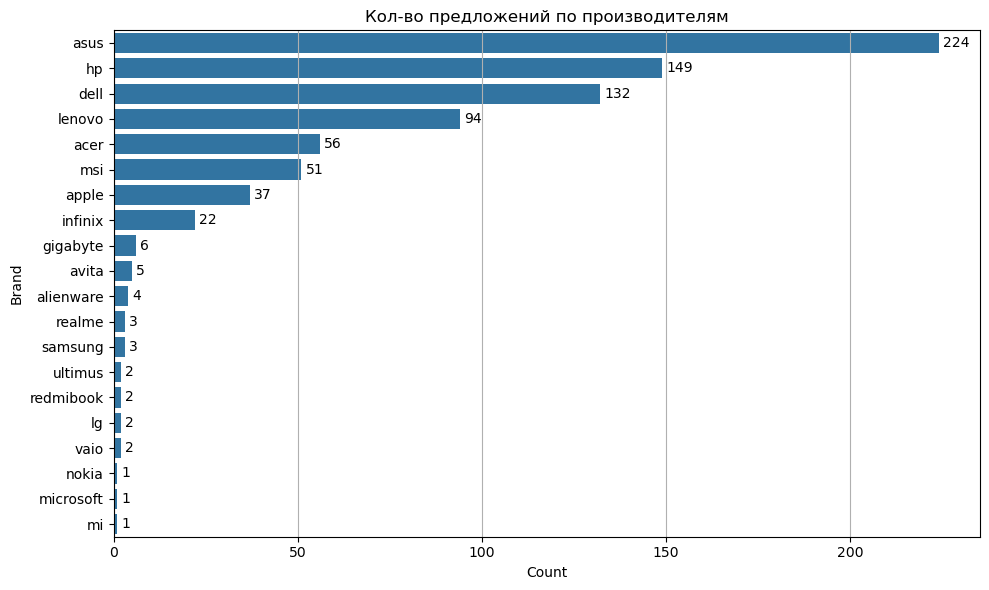

In [73]:
plt.figure(figsize=(10, 6))
plt.grid()
df_names_sort = df_names.sort_values(by='count', ascending=False)
ax = sns.barplot(y=df_names_sort.index, x=df_names_sort['count'])
for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3)
plt.title('Кол-во предложений по производителям')
plt.xlabel('Count')
plt.ylabel('Brand')
plt.tight_layout()
plt.show()

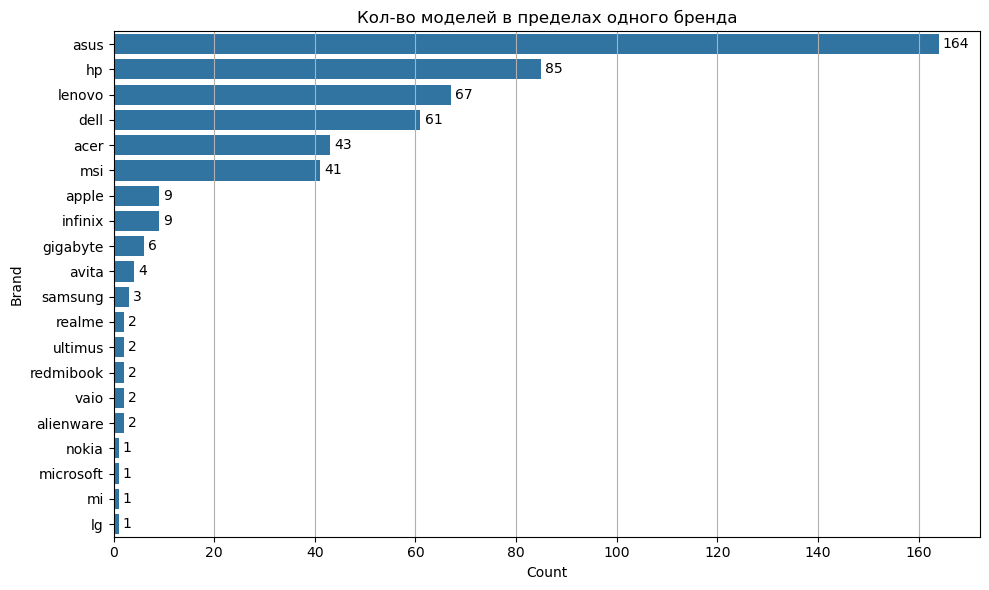

In [74]:
plt.figure(figsize=(10, 6))
plt.grid()
df_names_sort = df_names.sort_values(by='n_models', ascending=False)
ax = sns.barplot(y=df_names_sort.index, x=df_names_sort['n_models'])
for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3)
plt.title('Кол-во моделей в пределах одного бренда')
plt.xlabel('Count')
plt.ylabel('Brand')
plt.tight_layout()
plt.show()

In [75]:
df_brands = pd.DataFrame(df[['name', 'rating']])
df_brands['brand'] = df_brands['name'].apply(lambda x: x.split()[0].lower())
df_brands_rating = df_brands[~mask].groupby('brand').agg(mean_rating=('rating', 'mean'))
df_brands_rating

,mean_rating
brand,
acer,4.322917
alienware,4.400000
apple,4.668000
asus,4.326712
avita,3.750000
dell,4.135000
gigabyte,4.600000
hp,4.240217
infinix,4.183333


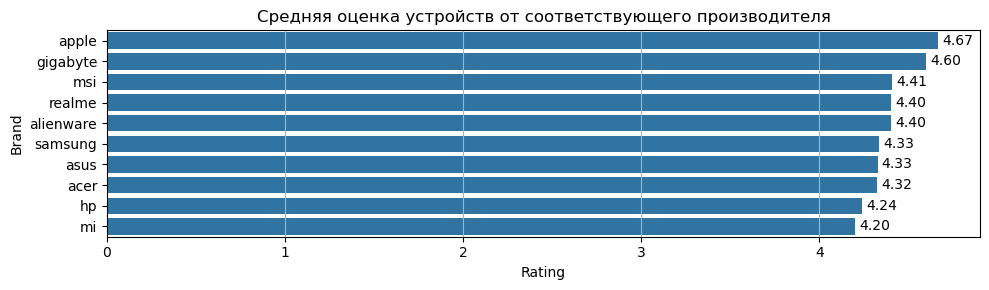

In [76]:
plt.figure(figsize=(10, 3))
plt.grid()
df_brand_sort = df_brands_rating.sort_values(by='mean_rating', ascending=False)
ax = sns.barplot(y=df_brand_sort.head(10).index, x=df_brand_sort.head(10)['mean_rating'])
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3)
plt.title('Средняя оценка устройств от соответствующего производителя')
plt.xlabel('Rating')
plt.ylabel('Brand')
plt.tight_layout()
plt.show()

**Выводы по итогам общего исследования:** <br>
1. По количеству моделей (без учета конфигураций характеристик) и общему объему предложений лидируют такие производители как: Lenovo, Asus, HP, Dell 
2. В большинстве случаев используются процессоры от производителей Intel и AMD, причем по кол-ву использований в устройствах Intel более чем в 2 раза превосходит AMD
3. Наиболее распространенными предложениями среди конфигураций внутреннего хранилища являются: 512 GB SSD, 1 TB SSD, 256 GB SSD
4. Наиболее распространенными конфигурациями RAM являются: 8 GB DDR4, 16 GB DDR4, 16 GB DDR5, 4 GB DDR4. Наиболее высокий рейтинг имеют ноутбуки с большим объемом оперативной памяти (16 GB, 32 GB)
5. Наиболее полулярными OC являются: Windows 10 и Windows 11, однако наиболее высокий рейтинг имеют устройства на базе MAC OS
6. Наиболее распространенными диагоналями дисплея являются диагонали: 14 дюймов, 15.6 дюймов
7. Большинство ноутбуков имеют стоимость 50000-100000 Rs.
8. Большинство ноутбуков имеют оценки от 4 до 5 баллов
9. Наивысший средний рейтинг имеют устройства от производителя Apple

**После изучения общей картины было принять решение провести анализ характеристик у моделей с оценками выше 4 баллов**

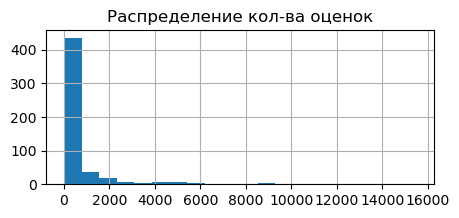

In [79]:
df[~mask]['no_of_ratings'].hist(bins=20, figsize=(5, 2));
plt.title('Распределение кол-ва оценок');

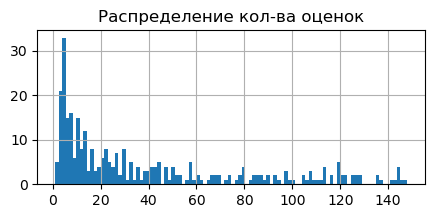

In [80]:
df[~mask][df[~mask]['no_of_ratings']<150]['no_of_ratings'].hist(bins=100, figsize=(5, 2));
plt.title('Распределение кол-ва оценок');

Как видно из распределения, большое количество моделей имеет менее 20 оценок

In [82]:
good_mask = (~mask) * (df['rating']>=4) * (df['no_of_ratings']>=5)
df_good = df[good_mask].copy()
df_good.reset_index(inplace=True)
print('Длина полученного датасета:', len(df_good))

Длина полученного датасета: 421


In [83]:
df_processor_good_rating = df_good[['processor', 'rating']].groupby('processor').mean().sort_values(by='rating', ascending=False)
df_ram_good_rating = df_good[['ram', 'rating']].groupby('ram').mean().sort_values(by='rating', ascending=False)
df_os_good_rating = df_good[['os', 'rating']].groupby('os').mean().sort_values(by='rating', ascending=False)
df_storage_good_rating = df_good[['storage', 'rating']][df_good['storage']!='No info'].groupby('storage').mean().sort_values(by='rating', ascending=False)
df_display_good_rating = df_good[['display(in inch)', 'rating']].groupby('display(in inch)').mean().sort_values(by='rating', ascending=False)
df_display_good_rating.index = df_display_good_rating.index.map(str)

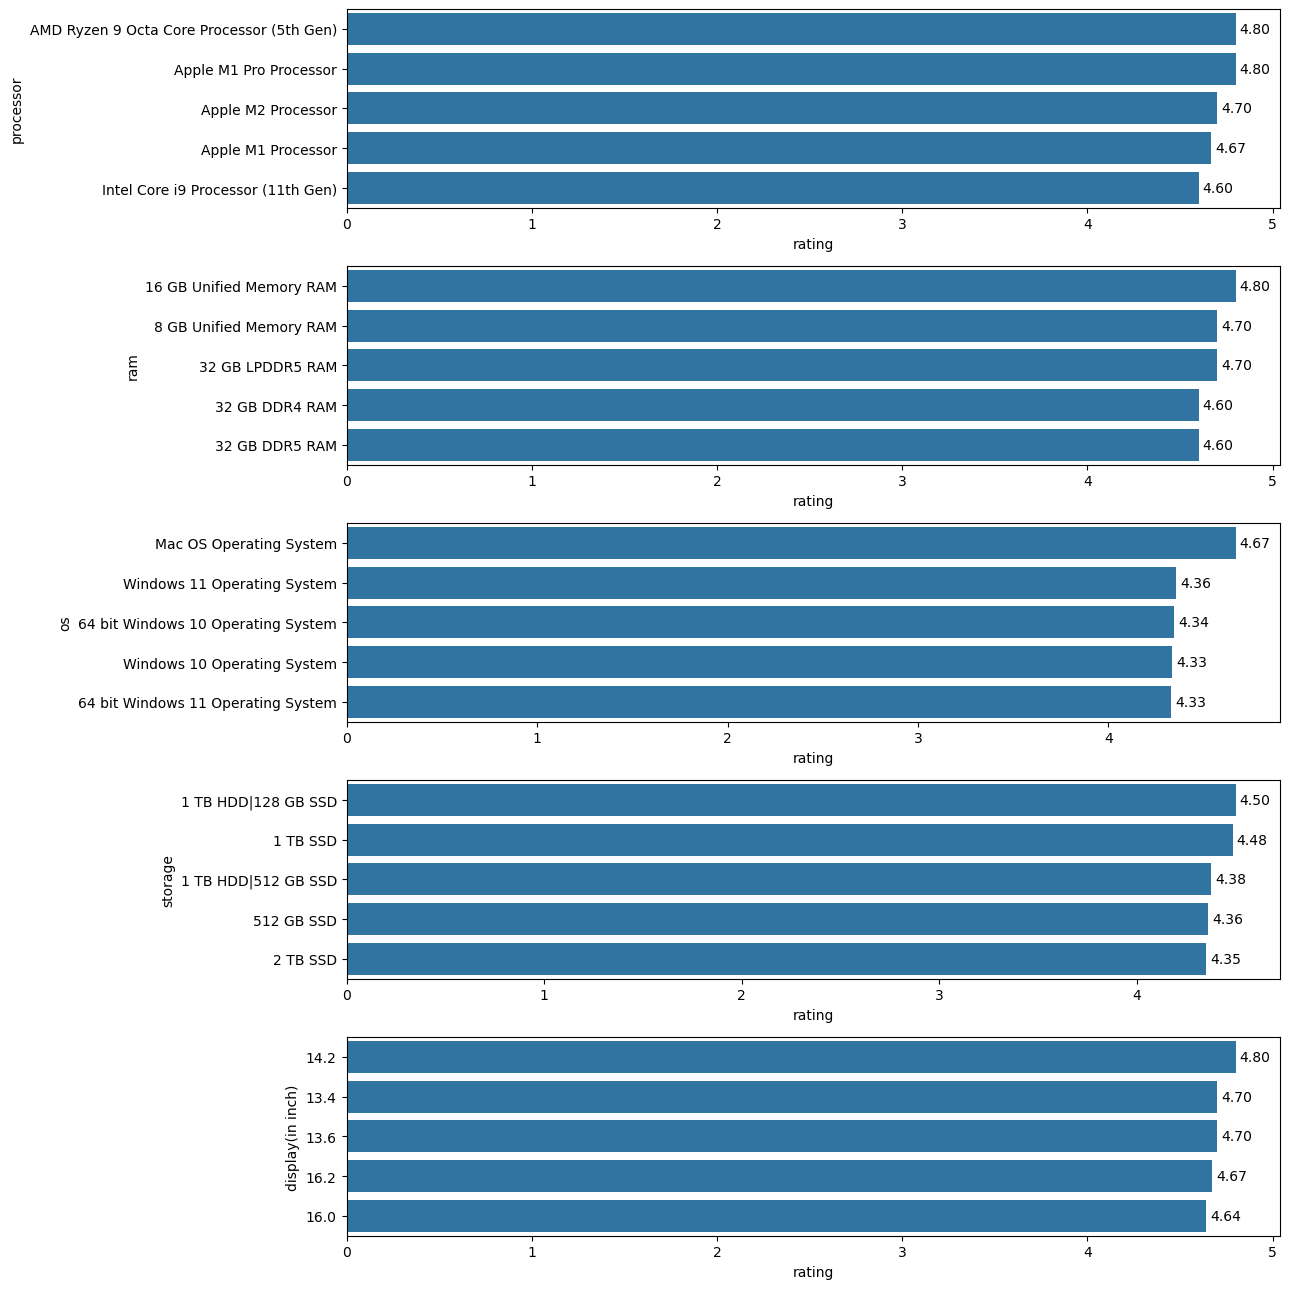

In [84]:
fig, ax = plt.subplots(5, 1, figsize=(13, 13))

plot = sns.barplot(
    y=df_processor_good_rating.head().index, 
    x=df_processor_good_rating.head()['rating'],
    ax=ax[0]
)

for container in plot.containers:
    plot.bar_label(container, fmt='%.2f', padding=3)

plot = sns.barplot(
    y=df_ram_good_rating.head().index, 
    x=df_ram_good_rating.head()['rating'],
    ax=ax[1]
)

for container in plot.containers:
    plot.bar_label(container, fmt='%.2f', padding=3)
    
plot = sns.barplot(
    y=df_os_good_rating.head().index, 
    x=df_os_good_rating.head()['rating'],
    ax=ax[2]
)

for container in plot.containers:
    plot.bar_label(container, fmt='%.2f', padding=3)
    
plot = sns.barplot(
    y=df_storage_good_rating.head().index, 
    x=df_storage_good_rating.head()['rating'],
    ax=ax[3]
)

for container in plot.containers:
    plot.bar_label(container, fmt='%.2f', padding=3)
    
plot = sns.barplot(
    y=df_display_good_rating.head().index, 
    x=df_display_good_rating.head()['rating'],
    ax=ax[4]
)

for container in plot.containers:
    plot.bar_label(container, fmt='%.2f', padding=3)
    
plt.tight_layout()

In [85]:
df[df['ram'].isin(['16 GB Unified Memory RAM', '8 GB Unified Memory RAM'])]['name'].unique()

array(['APPLE 2022 MacBook AIR M2', 'APPLE 2021 Macbook Pro M1 Pro',
       'APPLE 2023 MacBook Pro M2 Pro', 'APPLE 2022 MacBook Pro M2'],
      dtype=object)

Как видно из рассмотренных выше диаграмм, многие устройства от компании Apple имеют высокие рейтинги. Данное наблюдение позволяет задуматься о возможных факторах, повлиявших на большое количество положительных отзывов, например: продуманная экосистема, удобная операционная система, качество сборки, оптимизированное ПО и т.д.

Тем не менее, использование компонентов Apple в устройствах других производителей на данный момент не рассматривается. Поэтому необходимо исключить данные по моделям от компании Apple. Мы получили информацию о высоких отзывах и на основе этой информации можем генерировать новые гипотезы. <br>
Однако, нам необходимо определить, какими характеристиками должна обладать модель *нашего* ноутбука. Поэтому рассматриваться будут только те комплектующие, которые можно будет использовать в производстве.

In [88]:
not_apple_mask = ~df_good['name'].str.contains('apple', case=False)

df_processor_good_rating = (
    df_good.loc[not_apple_mask, ['processor', 'rating']]
    .groupby('processor')
    .mean()
    .sort_values(by='rating', ascending=False)
)

df_ram_good_rating = (
    df_good.loc[not_apple_mask, ['ram', 'rating']]
    .groupby('ram')
    .mean()
    .sort_values(by='rating', ascending=False)
)

df_os_good_rating = (
    df_good.loc[not_apple_mask, ['os', 'rating']]
    .groupby('os')
    .mean()
    .sort_values(by='rating', ascending=False)   
)
df_display_good_rating.index = df_display_good_rating.index.map(str)

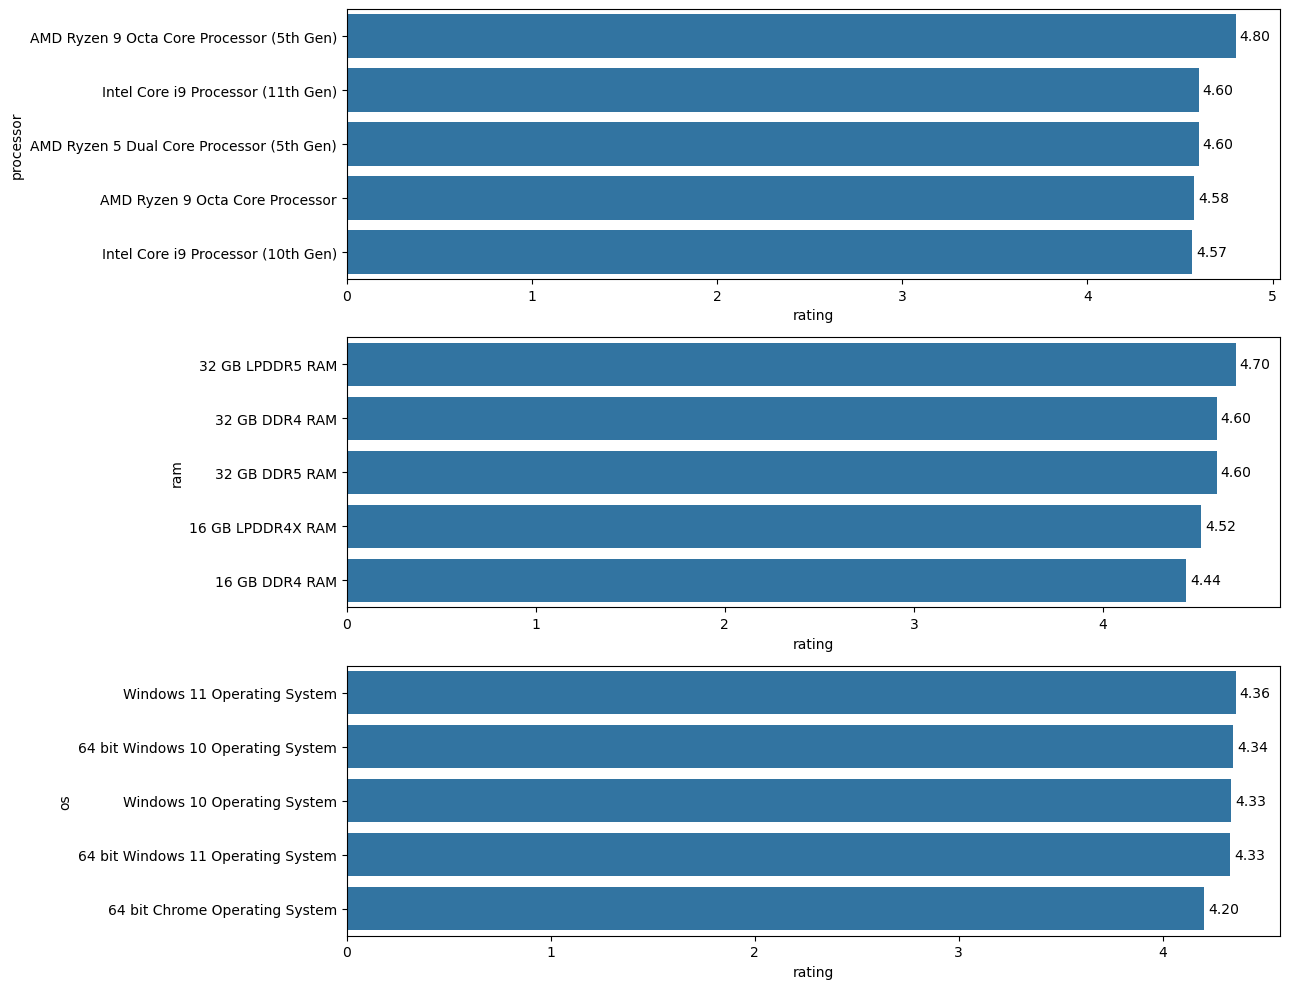

In [89]:
fig, ax = plt.subplots(3, 1, figsize=(13, 10))

plot = sns.barplot(
    y=df_processor_good_rating.head().index, 
    x=df_processor_good_rating.head()['rating'],
    ax=ax[0]
)

for container in plot.containers:
    plot.bar_label(container, fmt='%.2f', padding=3)

plot = sns.barplot(
    y=df_ram_good_rating.head().index, 
    x=df_ram_good_rating.head()['rating'],
    ax=ax[1]
)

for container in plot.containers:
    plot.bar_label(container, fmt='%.2f', padding=3)
    
plot = sns.barplot(
    y=df_os_good_rating.head().index, 
    x=df_os_good_rating.head()['rating'],
    ax=ax[2]
)

for container in plot.containers:
    plot.bar_label(container, fmt='%.2f', padding=3)
    
plt.tight_layout()

Диаграммы демонстрируют, что хорошими оценками обладают устройства с высокими техническими характеристиками (например, модель процессора или количество оперативной памяти)

Для полноты представления изучим рейтинги устройств с плохими оценками

In [92]:
bad_mask = (~mask) * (df['rating']<4) * (df['no_of_ratings']>=5)
df_bad = df[bad_mask].copy()
df_bad.reset_index(inplace=True)
print('Длина полученного датасета:', len(df_bad))

Длина полученного датасета: 67


In [93]:
df_processor_bad_rating = df_bad[['processor', 'rating']].groupby('processor').mean().sort_values(by='rating', ascending=False)
df_ram_bad_rating = df_bad[['ram', 'rating']].groupby('ram').mean().sort_values(by='rating', ascending=False)
df_os_bad_rating = df_bad[['os', 'rating']].groupby('os').mean().sort_values(by='rating', ascending=False)
df_storage_bad_rating = df_bad[['storage', 'rating']][df_bad['storage']!='No info'].groupby('storage').mean().sort_values(by='rating', ascending=False)
df_display_bad_rating = df_bad[['display(in inch)', 'rating']].groupby('display(in inch)').mean().sort_values(by='rating', ascending=False)
df_display_bad_rating.index = df_display_bad_rating.index.map(str)

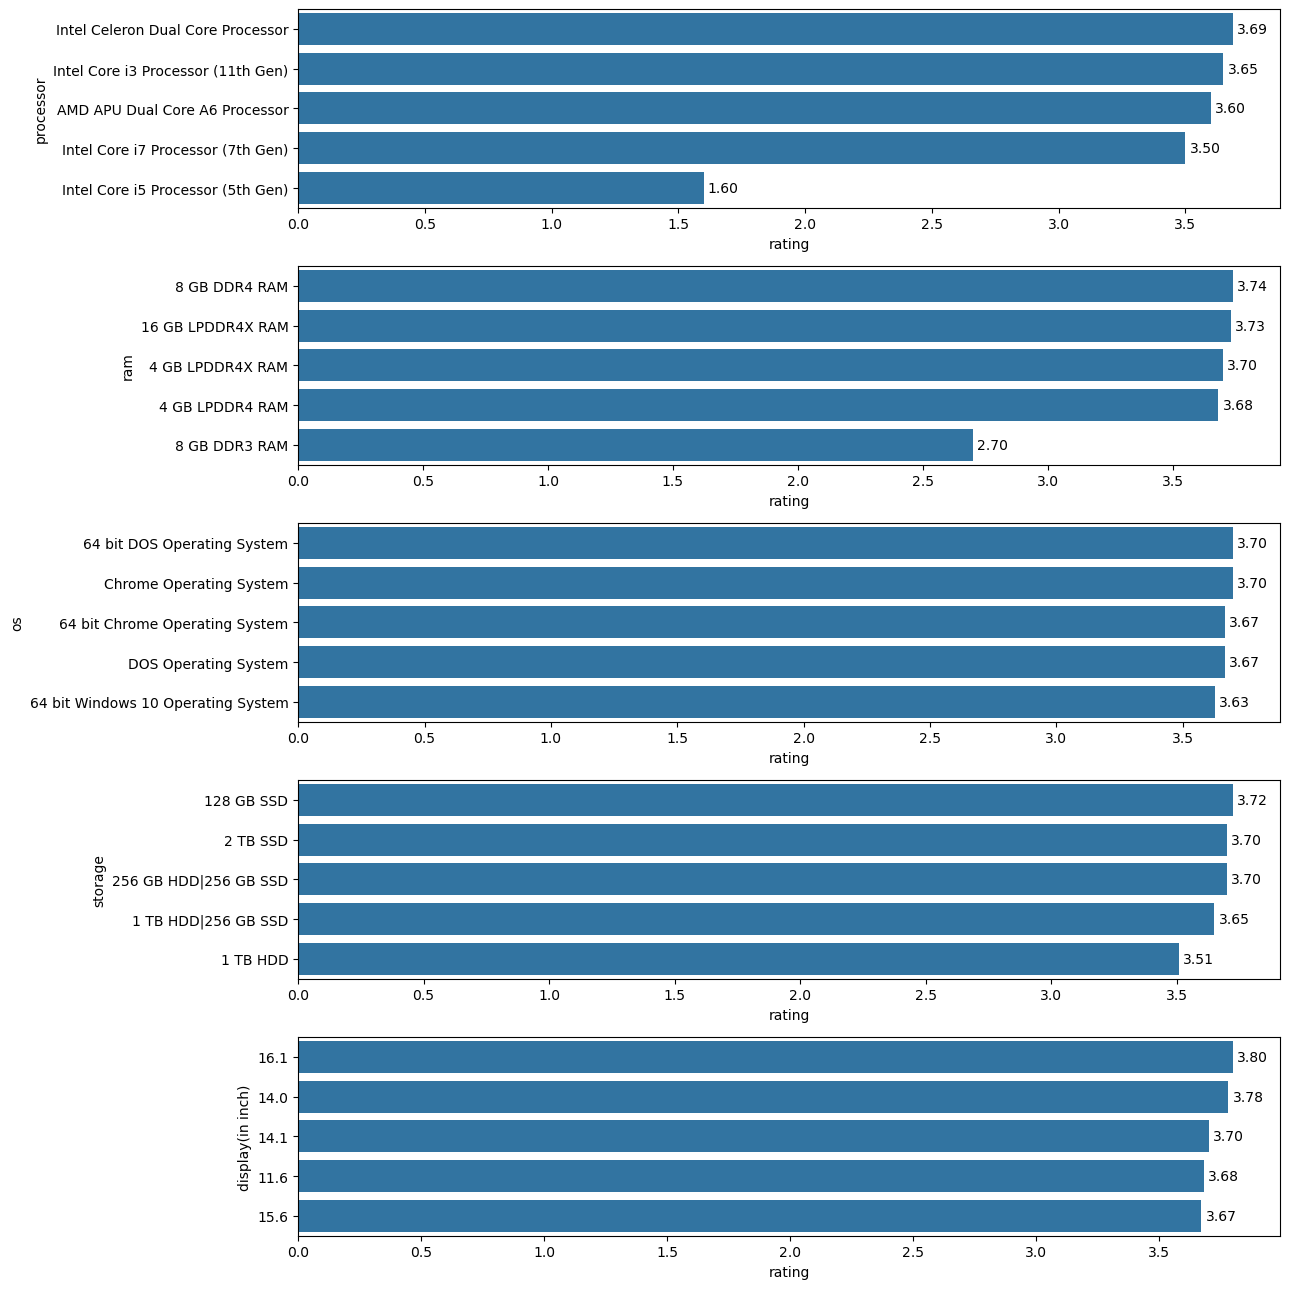

In [94]:
fig, ax = plt.subplots(5, 1, figsize=(13, 13))

plot = sns.barplot(
    y=df_processor_bad_rating.tail().index, 
    x=df_processor_bad_rating.tail()['rating'],
    ax=ax[0]
)

for container in plot.containers:
    plot.bar_label(container, fmt='%.2f', padding=3)

plot = sns.barplot(
    y=df_ram_bad_rating.tail().index, 
    x=df_ram_bad_rating.tail()['rating'],
    ax=ax[1]
)

for container in plot.containers:
    plot.bar_label(container, fmt='%.2f', padding=3)
    
plot = sns.barplot(
    y=df_os_bad_rating.tail().index, 
    x=df_os_bad_rating.tail()['rating'],
    ax=ax[2]
)

for container in plot.containers:
    plot.bar_label(container, fmt='%.2f', padding=3)
    
plot = sns.barplot(
    y=df_storage_bad_rating.tail().index, 
    x=df_storage_bad_rating.tail()['rating'],
    ax=ax[3]
)

for container in plot.containers:
    plot.bar_label(container, fmt='%.2f', padding=3)
    
plot = sns.barplot(
    y=df_display_bad_rating.tail().index, 
    x=df_display_bad_rating.tail()['rating'],
    ax=ax[4]
)

for container in plot.containers:
    plot.bar_label(container, fmt='%.2f', padding=3)
    
plt.tight_layout()

По итогам построения диаграмм с низким рейтингом можно сделать вывод,что низкие оценки в большинстве случаев имеют устройства со слабым процессором, с количеством оперативной памяти ниже среднего уровня (8 GB). Также видно, такие устройства имеют ОС отличные от Windows и MacOS.

Следует понимать, что некоторые параметры могут быть одинаковыми как у ноутбуков с высоким, так и с низким рейтингом. На впечатление от устройства может также влиять качество сборки, качество дисплея (не содержится информации в датасете) и другие факторы.

На основании построенных выше диаграмм видно, что наилучшие средние оценки имеют ноутбуки с "топовыми" характеристиками. Тем не менее, стоимость таких ноутбуков может заметно превышать средний уровень. Хорошие характеристики являются важным фактором, непосредственно влияющим на опыт использования устройтсва. Однако, при высокой стоимости устройства необходимо учитывать ряд моментов. Ниже перечислены некоторые из них:
- если наша компания является новой на рынке, то, клиенты могут не захотеть покупать дорогое устройство у неизвестной компании
- для комфортного решения большинства повседневных задач будет достаточно харакеристик среднего уровня. По этой причине большая часть клиентов может отдавать предпочтение моделям среднего класса
- высокая стоимость устройства может являться ограничением при покупке среди представителей клиентской аудитории, для которых цена является ключевым фактором

По указанным выше причинам следует ограничить стоимость рассматриваемых моделей.

Text(0, 0.5, 'rating')

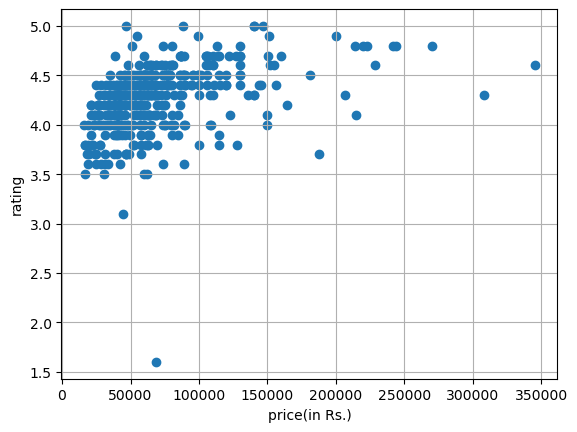

In [98]:
plt.scatter(
    df['price(in Rs.)'][df['no_of_ratings']>5],
    df['rating'][df['no_of_ratings']>5])
plt.grid()
plt.xlabel('price(in Rs.)')
plt.ylabel('rating')

На основании изучения диаграммы было принято решение рассмотреть модели стоимостью до 100000 Rs.

In [100]:
df_processor_good_rating = (
    df_good[['processor', 'rating']]
    [(~df_good['name'].str.contains('apple', case=False)) & (df_good['price(in Rs.)']<=100000)]
    .groupby('processor')
    .mean()
    .sort_values(by='rating', ascending=False)
)

df_ram_good_rating = (
    df_good[['ram', 'rating']]
    [(~df_good['name'].str.contains('apple', case=False)) & (df_good['price(in Rs.)']<=100000)]
    .groupby('ram')
    .mean()
    .sort_values(by='rating', ascending=False)
)

df_os_good_rating = (
    df_good[['os', 'rating']]
    [(~df_good['name'].str.contains('apple', case=False)) & (df_good['price(in Rs.)']<=100000)]
    .groupby('os')
    .mean()
    .sort_values(by='rating', ascending=False)   
)

df_storage_good_rating = (
    df_good[['storage', 'rating']]
    [(df_good['storage']!='No info') & (df_good['price(in Rs.)']<=100000)]
    .groupby('storage')
    .mean()
    .sort_values(by='rating', ascending=False)   
)

df_display_good_rating = (
    df_good[['display(in inch)', 'rating']]
    [(df_good['price(in Rs.)']<=100000)]
    .groupby('display(in inch)')
    .mean()
    .sort_values(by='rating', ascending=False)   
)
df_display_good_rating.index = df_display_good_rating.index.map(str)

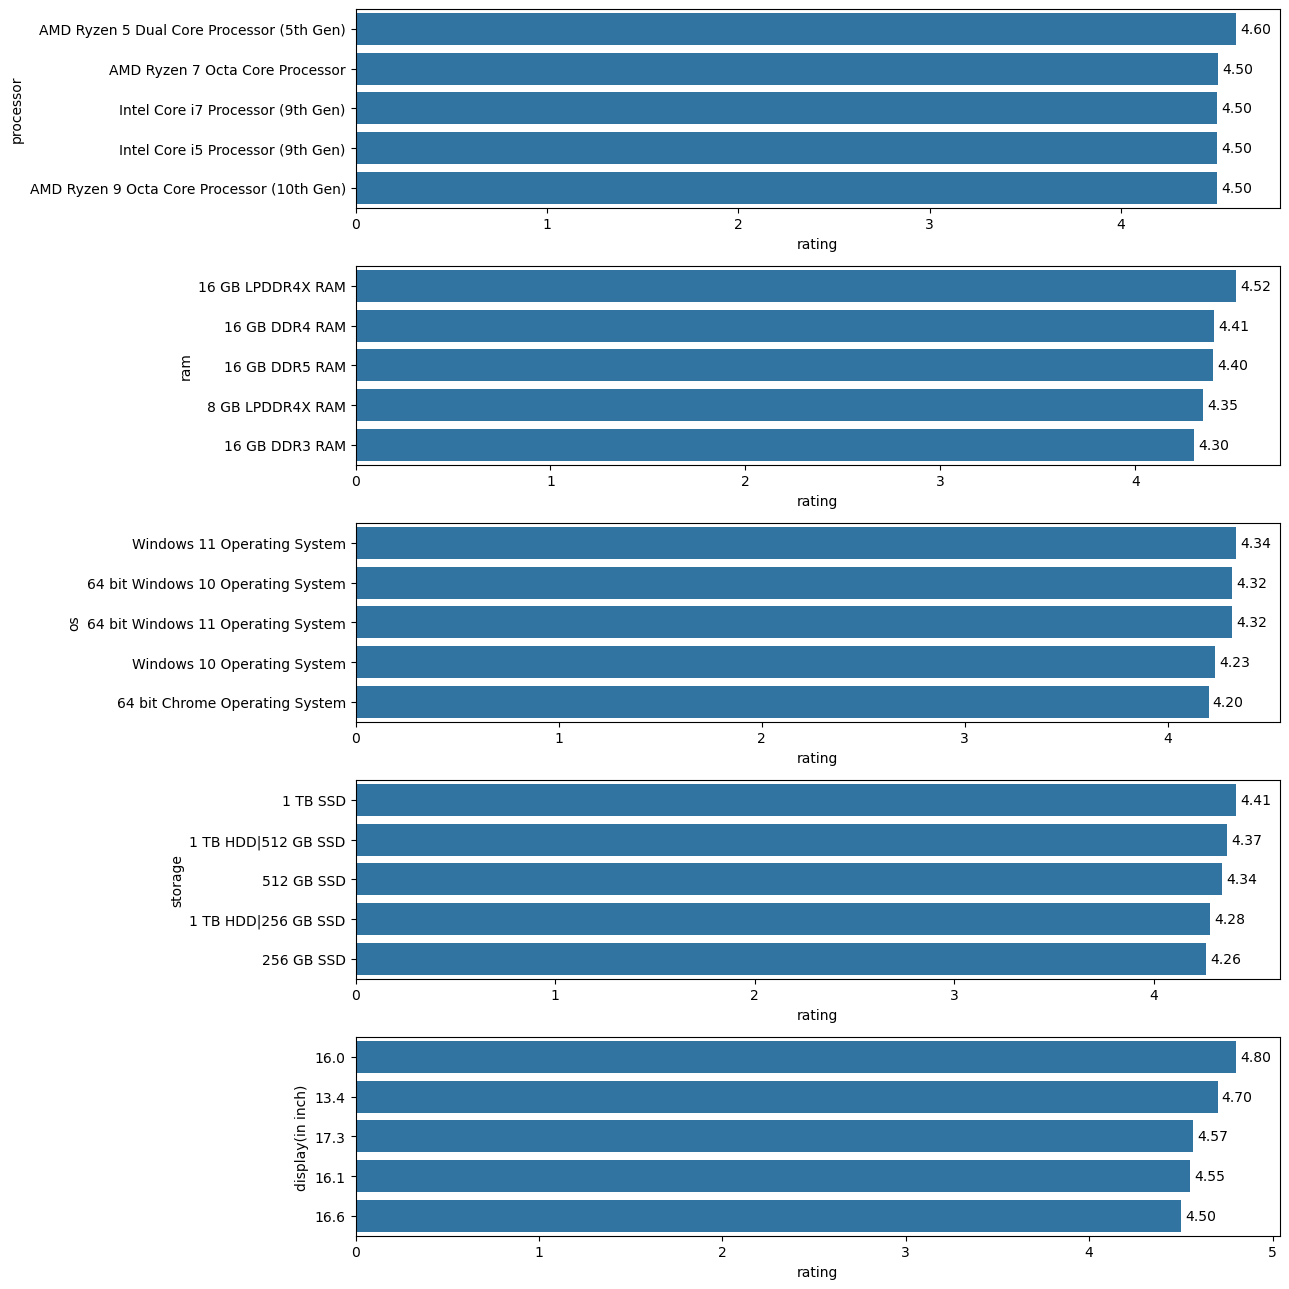

In [101]:
fig, ax = plt.subplots(5, 1, figsize=(13, 13))

plot = sns.barplot(
    y=df_processor_good_rating.head().index, 
    x=df_processor_good_rating.head()['rating'],
    ax=ax[0]
)

for container in plot.containers:
    plot.bar_label(container, fmt='%.2f', padding=3)

plot = sns.barplot(
    y=df_ram_good_rating.head().index, 
    x=df_ram_good_rating.head()['rating'],
    ax=ax[1]
)

for container in plot.containers:
    plot.bar_label(container, fmt='%.2f', padding=3)
    
plot = sns.barplot(
    y=df_os_good_rating.head().index, 
    x=df_os_good_rating.head()['rating'],
    ax=ax[2]
)

for container in plot.containers:
    plot.bar_label(container, fmt='%.2f', padding=3)
    
plot = sns.barplot(
    y=df_storage_good_rating.head().index, 
    x=df_storage_good_rating.head()['rating'],
    ax=ax[3]
)

for container in plot.containers:
    plot.bar_label(container, fmt='%.2f', padding=3)
    
plot = sns.barplot(
    y=df_display_good_rating.head().index, 
    x=df_display_good_rating.head()['rating'],
    ax=ax[4]
)

for container in plot.containers:
    plot.bar_label(container, fmt='%.2f', padding=3)
    
plt.tight_layout()

После изучения информации о средних рейтингах при ограничениях (ограничения и обоснования для их введения приведены выше) можно сделать ряд выводов:

**Выводы:**
1. В среднем сегменте в топ-5 процессоров входят: 3 модели от AMD и 2 модели от Intel
2. Согласно рейтингу, пользователи ставят много положительных отзывов устройствам с 16 ГБ RAM
3. Все 5 лучших позиций рейтинга ОС занимают операционные системы Windows 10 и Windows 11
4. Среди пятерки лучших опций внутреннего хранилища 3 позиции это накопители SSD, 2 опции предлагают комбинацию HDD и SSD
5. Большиством опций диагональных размеров в верхушке рейтинга являются опции от 16 до 17 дюймов (4/5 позиций). Однако, второе место в топе занимает вариант с диагональю 13.4 дюйма

### 4. Вычислить матрицу корреляции и построить heatmap для нее

In [105]:
df_corr = df[~mask][['price(in Rs.)', 'rating', 'no_of_ratings', 'no_of_reviews', 'display(in inch)']].corr()
df_corr

,price(in Rs.),rating,no_of_ratings,no_of_reviews,display(in inch)
price(in Rs.),1.000000,0.321031,-0.121662,-0.126380,0.078550
rating,0.321031,1.000000,0.074955,0.062850,0.013906
no_of_ratings,-0.121662,0.074955,1.000000,0.978092,-0.084972
no_of_reviews,-0.126380,0.062850,0.978092,1.000000,-0.078826
display(in inch),0.078550,0.013906,-0.084972,-0.078826,1.000000


<Axes: >

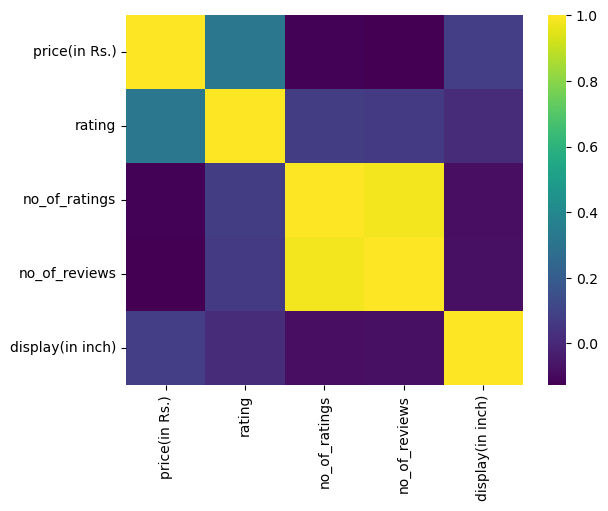

In [106]:
sns.heatmap(df_corr, cmap='viridis')

Анализ корреляции показал, что наибольшая связь с рейтингом прослеживается у стоимости устройства

Высокая корреляция наблюдается у количества отзывов и количества оценок

### Общий вывод по исследуемому датасету:

По результатам проведенного исследования можно сформировать ряд выводов и рекомендаций.

Необходимо определить целевую аудиторию выпускаемого продукта и класс устройства. От этого будут зависеть возможные варианты технических характеристик. <br>
**Если наша ЦА - это люди, готовые заплатить больше за лучшие технические характеристики:**
<br> Возможно, данному сегменту аудитории важны высокие технические характеристики. Некоторым пользователям важно качество сборки и материалов. Также, можно рассматривать ситуацию, при которой клиент уже пользовался премиальным устройством с хорошими характеристиками и хочет перейти на новое устройство такого же класса. Предположительно, такая аудитория будет согласна с высокой ценой устройства. <br>
В таком случае, можно рассмотреть следующие характеристики:
- **Процессор:** AMD Ryzen 9 Octa Core Processor (5th Gen), Intel Core i9 Processor (11th Gen)
- **RAM:** 32 GB LPDDR5 RAM, 32 GB DDR4 RAM, 32 GB DDR5 RAM
- **ОС:** Windows 10, Windows 11
- **Внутреннее хранилище:** комбинированное хранилище (1 TB HDD|128 GB SSD, 1 TB HDD|512 GB SSD, 1 TB HDD|256 GB SSD), SSD-накопители (1 TB SSD, 512 GB SSD)
- **Диагональ экрана:** возможны разные варианты (на основе результатов исследований, можно предложить такие варианты как: 14.2, 13.4, 13.6, 16.2, 16.0 дюймов)

**Если мы нацелены на средний сегмент** <br> 
Ноутбуки такого сегмента имеют среднюю стоимость. Такие устройства могут покрыть большинство задач обычного пользователя: работа с офисными программами, серфинг в интернете, потребление медиа-контента и т.д. <br>
В таком случае, можно рассмотреть следующие характеристики:
- **Процессор:** AMD Ryzen 5 Dual Core Processor (5th Gen), AMD Ryzen 7 Octa Core Processor, Intel Core i7 Processor (9th Gen), Intel Core i5 Processor (9th Gen)
- **RAM:** 16 Gb DDR4/LPDDR4X/DDR5 RAM
- **ОС:** Windows 10, Windows 11
- **Внутреннее хранилище:** комбинированное хранилище (1 TB HDD|512 GB SSD, 1 TB HDD|256 GB SSD), SSD-накопители (1 TB SSD, 512 GB SSD, 256 SSD)
- **Диагональ экрана:** исследование показало, что в категории до 100000 Rs. наивысшие рейтинги (1, 3, 4, 5 места) имеют ноутбуки с большими диагоналями (16.0, 17.3, 16.1, 16.6 дюймов). На втором месте расположены устройства с диагональю 13.4 дюйма

Как видим, в обоих сегментах устройств внутренне хранилище и ОС имеют похожие опции. Что такается диагоналей экранов, в проведенном исследовании, в среднем классе наивысшие рейтинги имеют ноутбуки с большими экранами. Предположительно, это может связано с тем, что ноутбук часто заменяет собой ПК и большую часть времени находится дома, поэтому компактность устройства является не самым приоритетным фактором. Более того, как было указано в рассуждении выше, ноутбуки среднего класса берут для покрытия большинства повседневных задач, в том числе для потребления медиа-контента. По этой причине пользователи ценят наличие большого экрана. В случае истинности данной гипотезы необходимо обратить внимание еще и на качество дисплея.

Данный датасет представляет ценность в контексте исследования и формирования гипотез. Однако, формирования окончательных выводов предоставленных данных может быть недостаточно. 
- Так, в предоставленном датасете не указано кол-во проданных устройств.
- Данные не предоставляют данные по некоторым характеристикам, например разрешение экрана или объем батареи
- Более того, необходимо учитывать условия покупки устройства. Например, ноутбук мог быть куплен во время проведения акции: обычная скидка, подарок при покупке или повышенный кешбек. По этой причине имеет смысл добавить в указанный датасет указание акционной кампании при ее наличии
- Если имеется доступ к базе с комментариями, будет полезно отобрать список моделей с достаточно большим числом отзывов с комментариями и провести анализ данных комментариев (например, при помощи языковых моделей). Таким образом, на основе информации из отзыва можно будет определить задачи, для решения которых покупался ноутбук, и то, как устройство справляется с данными задачами. При сопоставлении оценок и задач может появиться возможность установить, в каких задачах ноутбук показывает себя лучше всего. На основе данной информации можно будет подобрать оптимальные характеристики, которые будут устраивать ЦА. 

В ходе исследования был проведен анализ рейтинга моделей и их характеристик. На основе исследования были сформулированы рекомендации по техническим характеристикам устройств с учетом возможных предпочтений ЦА.<br>
Предполагается, что технические характеристики ноутбука сильно влияют на опыт работы с устройством. Тем не менее, для формирования итоговых выводов требуется провести дополнительные исследования. 